## 다중선형회귀분석

- #### CRIM, RM, LSTAT 세개 변수가  PRICE 에 영향을 주는지 확인
    - Boston 주택 가격데이터 이용 

- import statsmodels.api as sm

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import statsmodels.api as sm

In [2]:
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
boston_df["PRICE"] = pd.DataFrame(boston.target) # PRICE 변수 추가
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
x_data = boston_df[["CRIM", "RM", "LSTAT"]]  # x1 : CRIM, x2 : RM, x3 : LSTAT
x_data.head()

,CRIM,RM,LSTAT
0,0.00632,6.575,4.98
1,0.02731,6.421,9.14
2,0.02729,7.185,4.03
3,0.03237,6.998,2.94
4,0.06905,7.147,5.33


In [8]:
price = boston_df[["PRICE"]]  # y : price

In [12]:
x_data1 = sm.add_constant(x_data, has_constant = 'add')

In [14]:
multi_model = sm.OLS(price, x_data1)  # 다중회귀모형
fitted_model = multi_model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     305.2
Date:                Tue, 13 Jul 2021   Prob (F-statistic):          1.01e-112
Time:                        12:37:57   Log-Likelihood:                -1577.6
No. Observations:                 506   AIC:                             3163.
Df Residuals:                     502   BIC:                             3180.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5623      3.166     -0.809      0.419      -8.783       3.658
CRIM          -0.1029      0.032     -3.215      0.001      -0.166      -0.040
RM             5.2170      0.442     11.802      0.000       4.348       6.085
LSTAT         -0.5785      0.048    -12.135      0.000      -0.672      -0.485
==============================================================================
Omnibus:                      171.754   Durbin-Watson:                   0.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              628.308
Skew:                           1.535   Prob(JB):                    3.67e-137
Kurtosis:                       7.514   Cond. No.                         216.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- #### 단순선형회귀모델의 회귀계수와 비교

In [15]:
# 단순 선형 회귀모형
price = boston_df[["PRICE"]]
crim = boston_df[["CRIM"]]
crim1 = sm.add_constant(crim, has_constant = 'add')

In [16]:
model1 = sm.OLS(price, crim1)
fitted_model1 = model1.fit()

In [17]:
print(fitted_model1.params) # 단순회귀

const    24.033106
CRIM     -0.415190
dtype: float64


In [19]:
print(fitted_model.params) #다중 회귀

const   -2.562251
CRIM    -0.102941
RM       5.216955
LSTAT   -0.578486
dtype: float64


- #### 시각화

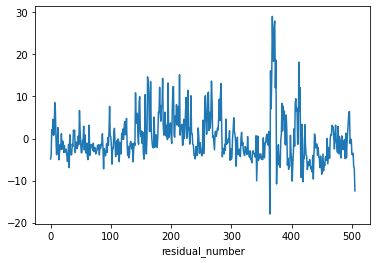

In [20]:
import matplotlib.pyplot as plt
fitted_model.resid.plot()
plt.xlabel("residual_number")
plt.show()

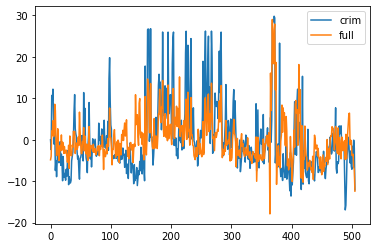

In [22]:
fitted_model1.resid.plot(label = "crim") #단순회귀 잔차모형
fitted_model.resid.plot(label = "full")  #다중회귀 잔차모형 --> 다중회귀모형이 단순회귀모형보다 잔차가 작아 더 나은 모델이라 할 수 있다.
plt.legend()

- #### 상관계수/산점도를 통해 다중공선성 확인

In [24]:
x_data.head()

,CRIM,RM,LSTAT
0,0.00632,6.575,4.98
1,0.02731,6.421,9.14
2,0.02729,7.185,4.03
3,0.03237,6.998,2.94
4,0.06905,7.147,5.33


In [23]:
x_data.corr() # CRIM, RM, LSTAT

,CRIM,RM,LSTAT
CRIM,1.000000,-0.219247,0.455621
RM,-0.219247,1.000000,-0.613808
LSTAT,0.455621,-0.613808,1.000000


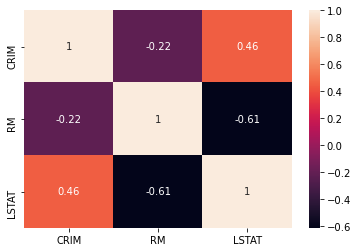

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(x_data.corr(), annot = True) # 히트맵
plt.show()

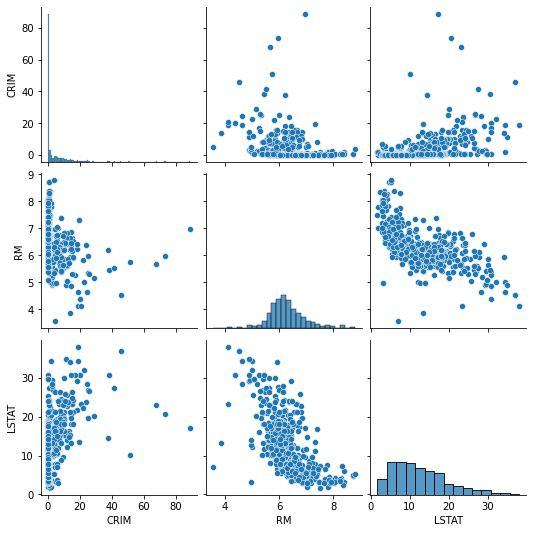

In [26]:
sns.pairplot(x_data) #산점도
plt.show()

- #### VIF를 통한 다중공선성 확인

- from statsmodels.stats.outliers_influence import variance_inflation_factor

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_data.values, i) for i in range(x_data.shape[1])]
vif["features"] = x_data.columns
vif

,VIF Factor,features
0,1.475257,CRIM
1,3.379490,RM
2,4.167763,LSTAT


In [34]:
vif = pd.DataFrame()
x_data2 = x_data.drop('LSTAT', axis = 1) # LSTAT 제거
vif["VIF Factor"] = [variance_inflation_factor(x_data2.values, i) for i in range(x_data2.shape[1])]
vif["features"] = x_data2.columns
vif

,VIF Factor,features
0,1.151584,CRIM
1,1.151584,RM


In [35]:
x_data3 = sm.add_constant(x_data2, has_constant = 'add')
model_vif = sm.OLS(price, x_data3)
fitted_model_vif = model_vif.fit()

In [36]:
fitted_model_vif.summary() # vif 모델

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     297.6
Date:                Tue, 13 Jul 2021   Prob (F-statistic):           5.22e-86
Time:                        13:21:14   Log-Likelihood:                -1642.7
No. Observations:                 506   AIC:                             3291.
Df Residuals:                     503   BIC:                             3304.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -29.2447      2.588    -11.300      0.000     -34.330     -24.160
CRIM          -0.2649      0.033     -8.011      0.000      -0.330      -0.200
RM             8.3911      0.405     20.726      0.000       7.596       9.186
==============================================================================
Omnibus:                      172.412   Durbin-Watson:                   0.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1047.536
Skew:                           1.349   Prob(JB):                    3.39e-228
Kurtosis:                       9.512   Cond. No.                         92.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
fitted_model.summary() #다중회귀모델

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     305.2
Date:                Tue, 13 Jul 2021   Prob (F-statistic):          1.01e-112
Time:                        13:21:44   Log-Likelihood:                -1577.6
No. Observations:                 506   AIC:                             3163.
Df Residuals:                     502   BIC:                             3180.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5623      3.166     -0.809      0.419      -8.783       3.658
CRIM          -0.1029      0.032     -3.215      0.001      -0.166      -0.040
RM             5.2170      0.442     11.802      0.000       4.348       6.085
LSTAT         -0.5785      0.048    -12.135      0.000      -0.672      -0.485
==============================================================================
Omnibus:                      171.754   Durbin-Watson:                   0.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              628.308
Skew:                           1.535   Prob(JB):                    3.67e-137
Kurtosis:                       7.514   Cond. No.                         216.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- #### 학습 / 검증데이터 분할

- from sklearn.model_selection import train_test_split

In [53]:
x_data.head()

,CRIM,RM,LSTAT
0,0.00632,6.575,4.98
1,0.02731,6.421,9.14
2,0.02729,7.185,4.03
3,0.03237,6.998,2.94
4,0.06905,7.147,5.33


In [38]:
from sklearn.model_selection import train_test_split

X = x_data
y = price
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 102) # 7 : 3 분할
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(354, 3) (152, 3) (354, 1) (152, 1)


In [39]:
x_train2 = sm.add_constant(x_train, has_constant = 'add')
fit_1 = sm.OLS(y_train, x_train2)
fit_1 = fit_1.fit()

In [40]:
x_test2 = sm.add_constant(x_test, has_constant = 'add')
fit_1.predict(x_test2)

404     5.439925
302    26.379176
465    18.944288
278    27.196242
295    28.757754
         ...    
8       9.191039
459    19.858532
165    23.326341
461    21.778478
476    19.799286
Length: 152, dtype: float64

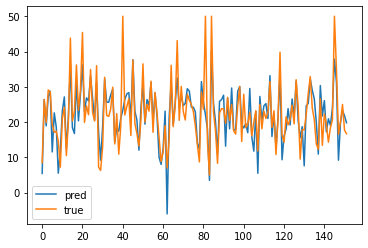

In [41]:
plt.plot(np.array(fit_1.predict(x_test2)), label = "pred")
plt.plot(np.array(y_test), label = "true")
plt.legend()
plt.show()

In [42]:
X = x_data2
y = price
x2_train, x2_test, y2_train, y2_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 102) # 7 : 3 분할
print(x2_train.shape, x2_test.shape, y2_train.shape, y2_test.shape)

(354, 2) (152, 2) (354, 1) (152, 1)


In [43]:
x2_train2 = sm.add_constant(x2_train, has_constant = 'add')
fit_2 = sm.OLS(y2_train, x2_train2)
fit_2 = fit_2.fit()

In [44]:
x2_test2 = sm.add_constant(x2_test, has_constant = 'add')

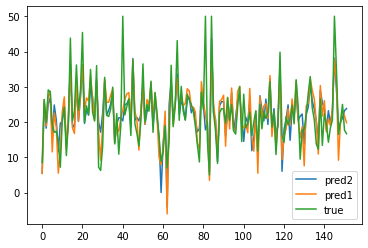

In [47]:
plt.plot(np.array(fit_2.predict(x2_test2)), label = "pred2")
plt.plot(np.array(fit_1.predict(x_test2)), label = "pred1")
plt.plot(np.array(y2_test), label = "true")
plt.legend()
plt.show()

- #### MSE를 통한 검증데이터에 대한 성능비교

- from sklearn.metrics import mean_squared_error

In [48]:
from sklearn.metrics import mean_squared_error  # MSE

In [51]:
mean_squared_error(y_true = y_test['PRICE'], y_pred = fit_1.predict(x_test2))

28.05204389950629

In [52]:
mean_squared_error(y_true = y2_test['PRICE'], y_pred = fit_2.predict(x2_test2))

34.72978507893944